In [1]:
import pandas as pd

```python
def funcion_decorador(funcion_original):
    def wrapper(*args, **kargs):
        # antes de la funcion
        resultado = funcion_original(*args, **kargs)
        # despu'es de la funci'on
        return resultado
    return wrapper
```

In [13]:
def imprimir_antes_despues(func):
    def wrapper(*args, **kwargs):
        print("Antes de la función.")
        resultado = func(*args, **kwargs)  # Ejecuta la función original
        print("Después de la función.")
        return resultado
    return wrapper


@imprimir_antes_despues
def hola_mundo(palabra):
    print(f"Hola mundo {palabra}")

hola_mundo('cruel')

Antes de la función.
Hola mundo cruel
Después de la función.


In [3]:
def agregar_promedio_diario_to(func):
    """Decorador que agrega una columna de promedio diario para la columna 'To'."""
    def wrapper(file_path):
        # Llama a la función original para obtener el DataFrame
        df = func(file_path)
        df['To_daily_mean'] = df['To'].resample('D').mean()
        return df
    return wrapper


In [16]:
# @agregar_promedio_diario_to
def importa_clima(file_path):
    """Importa un archivo CSV y pone la columna 0 como índice, regresa un dataframe vacio si la ruta es incorrecta"""
    try:
        df = pd.read_csv(file_path,index_col=0,parse_dates=True)    
    except:
        print("El archivo o ruta es incorrecto")
        print(file_path)
        df = None
    finally:
        return df

In [17]:
tmx = importa_clima("../../data/Temixco_2018_10Min.csv")
tmx

,Ib,Ig,To,RH,WS,WD,P
time,,,,,,,
2018-01-01 00:00:00,NaN,NaN,18.70,36.34,1.422,316.0,87864.11
2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.7,87876.37
2018-01-01 00:20:00,0.170,0.0,18.94,35.43,1.565,326.0,87888.64
2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.5,87887.21
2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.0,87886.91
...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.125,0.0,18.51,47.29,1.715,332.2,87484.32
2018-12-31 23:20:00,0.000,0.0,18.26,48.02,1.703,320.5,87470.70
2018-12-31 23:30:00,0.044,0.0,18.39,46.84,2.887,335.7,87455.03


<Axes: xlabel='time'>

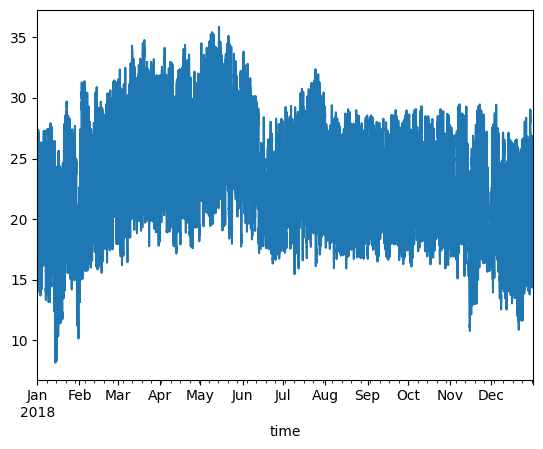

In [19]:
tmx.To.plot()
# tmx.To_daily_mean.dropna().plot()